In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#定义观察时间窗口
df = pd.read_csv('./CreditSampleWindow.csv')

In [3]:
df

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE
0,CID0128273,,M0,20170701.0,20170703.0
1,CID0214787,,M0,20180201.0,20180204.0
2,CID0287932,M4,M5,20180501.0,20180531.0
3,CID0351850,,M0,20161002.0,20161005.0
4,CID0217310,,M0,20150601.0,20150602.0
...,...,...,...,...,...
1813152,CID0319068,,M0,20170501.0,20170502.0
1813153,CID0246604,,M0,20180301.0,20180302.0
1813154,CID0083781,,M0,20171001.0,20171004.0
1813155,CID0358959,,M0,20180501.0,20180504.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813157 entries, 0 to 1813156
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CID         object 
 1   STAGE_BEF   object 
 2   STAGE_AFT   object 
 3   START_DATE  float64
 4   CLOSE_DATE  float64
dtypes: float64(2), object(3)
memory usage: 69.2+ MB


In [5]:
df.head()

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE
0,CID0128273,,M0,20170701.0,20170703.0
1,CID0214787,,M0,20180201.0,20180204.0
2,CID0287932,M4,M5,20180501.0,20180531.0
3,CID0351850,,M0,20161002.0,20161005.0
4,CID0217310,,M0,20150601.0,20150602.0


In [6]:
df.isnull().mean()

CID           0.000000
STAGE_BEF     0.082451
STAGE_AFT     0.082451
START_DATE    0.082451
CLOSE_DATE    0.082451
dtype: float64

In [7]:
df.dropna(subset=['STAGE_BEF','STAGE_AFT'], inplace=True)

In [8]:
df.isnull().mean()

CID           0.0
STAGE_BEF     0.0
STAGE_AFT     0.0
START_DATE    0.0
CLOSE_DATE    0.0
dtype: float64

In [9]:
#将整体数据进行去重
df.drop_duplicates(inplace=True)

In [10]:
df['FLAG'] = df.STAGE_AFT.str[-1]

In [11]:
df

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE,FLAG
0,CID0128273,,M0,20170701.0,20170703.0,0
1,CID0214787,,M0,20180201.0,20180204.0,0
2,CID0287932,M4,M5,20180501.0,20180531.0,5
3,CID0351850,,M0,20161002.0,20161005.0,0
4,CID0217310,,M0,20150601.0,20150602.0,0
...,...,...,...,...,...,...
1813152,CID0319068,,M0,20170501.0,20170502.0,0
1813153,CID0246604,,M0,20180301.0,20180302.0,0
1813154,CID0083781,,M0,20171001.0,20171004.0,0
1813155,CID0358959,,M0,20180501.0,20180504.0,0


In [12]:
#时间转化
df['START_DATE'] = df.START_DATE.map(lambda x: int(x//100))
df['CLOSE_DATE'] = df.CLOSE_DATE.map(lambda x: int(x//100))

In [13]:
df

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE,FLAG
0,CID0128273,,M0,201707,201707,0
1,CID0214787,,M0,201802,201802,0
2,CID0287932,M4,M5,201805,201805,5
3,CID0351850,,M0,201610,201610,0
4,CID0217310,,M0,201506,201506,0
...,...,...,...,...,...,...
1813152,CID0319068,,M0,201705,201705,0
1813153,CID0246604,,M0,201803,201803,0
1813154,CID0083781,,M0,201710,201710,0
1813155,CID0358959,,M0,201805,201805,0


In [14]:
aft_date = df[['CID', 'STAGE_AFT', 'START_DATE', 'CLOSE_DATE', 'FLAG']].copy()

In [15]:
def_date = df[['CID', 'STAGE_BEF', 'START_DATE', 'CLOSE_DATE', 'FLAG']].copy()

In [16]:
#改名 使其一致
def_date.rename(columns={'STAGE_BEF': 'STAGE_AFT'}, inplace=True)

In [17]:
#拼接
form_date = aft_date.append(def_date, ignore_index=True)

In [18]:
form_date

,CID,STAGE_AFT,START_DATE,CLOSE_DATE,FLAG
0,CID0128273,M0,201707,201707,0
1,CID0214787,M0,201802,201802,0
2,CID0287932,M5,201805,201805,5
3,CID0351850,M0,201610,201610,0
4,CID0217310,M0,201506,201506,0
...,...,...,...,...,...
3327315,CID0319068,,201705,201705,0
3327316,CID0246604,,201803,201803,0
3327317,CID0083781,,201710,201710,0
3327318,CID0358959,,201805,201805,0


In [19]:
form_date.STAGE_AFT.value_counts()

M0    1481177
      1107267
M1     413944
M2      70233
M3      55641
M4      46365
M5      41498
M6      38901
M7      32713
M8      26984
M9      12597
Name: STAGE_AFT, dtype: int64

In [20]:
form_date.replace(to_replace='  ', value=np.NAN, inplace=True)

In [21]:
form_date

,CID,STAGE_AFT,START_DATE,CLOSE_DATE,FLAG
0,CID0128273,M0,201707,201707,0
1,CID0214787,M0,201802,201802,0
2,CID0287932,M5,201805,201805,5
3,CID0351850,M0,201610,201610,0
4,CID0217310,M0,201506,201506,0
...,...,...,...,...,...
3327315,CID0319068,NaN,201705,201705,0
3327316,CID0246604,NaN,201803,201803,0
3327317,CID0083781,NaN,201710,201710,0
3327318,CID0358959,NaN,201805,201805,0


In [22]:
form_date.dropna(inplace=True)

In [23]:
form_date

,CID,STAGE_AFT,START_DATE,CLOSE_DATE,FLAG
0,CID0128273,M0,201707,201707,0
1,CID0214787,M0,201802,201802,0
2,CID0287932,M5,201805,201805,5
3,CID0351850,M0,201610,201610,0
4,CID0217310,M0,201506,201506,0
...,...,...,...,...,...
3327297,CID0032857,M0,201704,201704,1
3327298,CID0061462,M1,201805,0,2
3327301,CID0128391,M1,201801,201803,2
3327303,CID0299548,M0,201801,201801,1


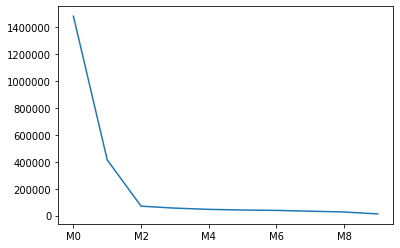

In [24]:
form_date.STAGE_AFT.value_counts().plot()

In [25]:
#观察时间窗口：M2


In [26]:
#表现时间窗口

In [27]:
#开卡时间
df2 = pd.read_csv('./CreditFirstUse.csv')

In [28]:
df2

,CID,FST_USE_DT
0,CID0092102,20161116
1,CID0111878,20161118
2,CID0264977,20161120
3,CID0059996,20160907
4,CID0057096,20160910
...,...,...
388254,CID0349633,20161207
388255,CID0010046,20161207
388256,CID0089903,20161202
388257,CID0165124,20161208


In [29]:
df2['FST_USE_DT'] = df2.FST_USE_DT.map(lambda x : int(x//100))

In [30]:
df2

,CID,FST_USE_DT
0,CID0092102,201611
1,CID0111878,201611
2,CID0264977,201611
3,CID0059996,201609
4,CID0057096,201609
...,...,...
388254,CID0349633,201612
388255,CID0010046,201612
388256,CID0089903,201612
388257,CID0165124,201612


In [31]:
form_date.FLAG = form_date.FLAG.astype('int32')

In [32]:
#找出逾期程度到M2的用户
overduce_user = form_date[form_date.FLAG > 2]

In [33]:
overduce_user

,CID,STAGE_AFT,START_DATE,CLOSE_DATE,FLAG
2,CID0287932,M5,201805,201805,5
5,CID0010329,M7,201701,201702,7
17,CID0349107,M3,201803,201804,3
18,CID0125358,M3,201803,201804,3
22,CID0280274,M5,201707,201708,5
...,...,...,...,...,...
3327270,CID0060713,M6,201802,201803,7
3327276,CID0236570,M2,201803,201804,3
3327280,CID0178778,M5,201804,201805,6
3327284,CID0063367,M5,201802,201803,6


In [34]:
#首次逾期时间
fst_overduce = overduce_user.groupby(by='CID').START_DATE.min()

In [35]:
fst_overduce

CID
CID0000013    201603
CID0000018    201805
CID0000019    201712
CID0000043    201710
CID0000046    201610
               ...  
CID0388161    201711
CID0388164    201709
CID0388175    201707
CID0388199    201704
CID0388239    201703
Name: START_DATE, Length: 28446, dtype: int64

In [36]:
#拼接 左连接
df2_overduce = pd.merge(left=df2, right=pd.DataFrame(fst_overduce),left_on='CID', right_index=True, how='inner')

In [37]:
df2_overduce

,CID,FST_USE_DT,START_DATE
16,CID0082006,201609,201705
17,CID0383647,201609,201709
30,CID0006192,201610,201708
53,CID0155834,201611,201707
69,CID0383006,201611,201709
...,...,...,...
388131,CID0132053,201608,201804
388149,CID0363951,201608,201707
388156,CID0232437,201608,201805
388193,CID0242433,201612,201801


In [38]:
from datetime import datetime

In [39]:
def train(x):
    x = int(x)
    x= str(x)
    year = x[:4]
    month = x[4:]
    return datetime(int(year), int(month), 1)

In [40]:
df2_overduce.FST_USE_DT = df2_overduce.FST_USE_DT.map(train)
df2_overduce.START_DATE = df2_overduce.START_DATE.map(train)

In [41]:
df2_overduce

,CID,FST_USE_DT,START_DATE
16,CID0082006,2016-09-01,2017-05-01
17,CID0383647,2016-09-01,2017-09-01
30,CID0006192,2016-10-01,2017-08-01
53,CID0155834,2016-11-01,2017-07-01
69,CID0383006,2016-11-01,2017-09-01
...,...,...,...
388131,CID0132053,2016-08-01,2018-04-01
388149,CID0363951,2016-08-01,2017-07-01
388156,CID0232437,2016-08-01,2018-05-01
388193,CID0242433,2016-12-01,2018-01-01


In [42]:
#加时间差列 : 月份差值
df2_overduce['range_month'] = (df2_overduce.START_DATE - df2_overduce.FST_USE_DT).dt.days//30

In [43]:
df2_overduce

,CID,FST_USE_DT,START_DATE,range_month
16,CID0082006,2016-09-01,2017-05-01,8
17,CID0383647,2016-09-01,2017-09-01,12
30,CID0006192,2016-10-01,2017-08-01,10
53,CID0155834,2016-11-01,2017-07-01,8
69,CID0383006,2016-11-01,2017-09-01,10
...,...,...,...,...
388131,CID0132053,2016-08-01,2018-04-01,20
388149,CID0363951,2016-08-01,2017-07-01,11
388156,CID0232437,2016-08-01,2018-05-01,21
388193,CID0242433,2016-12-01,2018-01-01,13


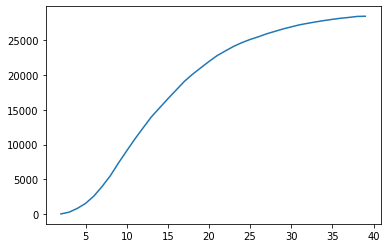

In [44]:
df2_overduce.range_month.value_counts().sort_index().cumsum().plot()

In [45]:
# 表现时间窗口： 24month（两年）


In [46]:
# 结论
    #定义坏客户：超过M2逾期阶段的客户为坏客户
    #观察周期：24month

# 建模阶段

In [47]:
train_data = pd.read_csv('./cs-training.csv', index_col=0)

In [48]:
train_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [50]:
train_data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [51]:
#空值比率
train_data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

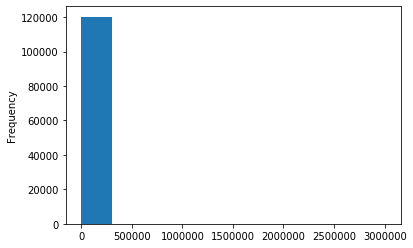

In [52]:
train_data.MonthlyIncome.plot(kind='hist')

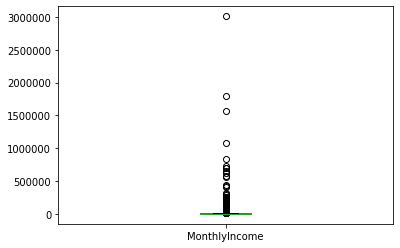

In [53]:
train_data.MonthlyIncome.plot(kind='box')

In [54]:
train_data.MonthlyIncome.describe([0.99])

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
50%      5.400000e+03
99%      2.500000e+04
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [55]:
income = train_data.MonthlyIncome[train_data.MonthlyIncome<25000]

In [56]:
income

1         9120.0
2         2600.0
3         3042.0
4         3300.0
6         3500.0
           ...  
149995    3400.0
149996    2100.0
149997    5584.0
149999    5716.0
150000    8158.0
Name: MonthlyIncome, Length: 118959, dtype: float64

In [57]:
income = train_data.MonthlyIncome[train_data.MonthlyIncome<25000]

In [58]:
#中位数
med_income = income.median()

In [59]:
train_data.MonthlyIncome.fillna(med_income, inplace=True)

In [60]:
train_data.MonthlyIncome.isnull().sum()

0

In [61]:
train_data.NumberOfDependents.fillna(train_data.NumberOfDependents.mode()[0], inplace=True)

In [62]:
train_data[train_data.age==0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [63]:
train_data = train_data[train_data.age>0]

In [64]:
train_data.describe([0.01, 0.99]).T

,count,mean,std,min,1%,50%,99%,max
SeriousDlqin2yrs,149999.0,0.066840,0.249746,0.0,0.0,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149999.0,6.048472,249.756203,0.0,0.0,0.154176,1.092958,50708.0
age,149999.0,52.295555,14.771298,21.0,24.0,52.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149999.0,0.421029,4.192795,0.0,0.0,0.000000,4.000000,98.0
DebtRatio,149999.0,353.007426,2037.825113,0.0,0.0,0.366503,4979.080000,329664.0
MonthlyIncome,149999.0,6405.177775,12891.515331,0.0,0.0,5333.000000,23000.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149999.0,8.452776,5.145964,0.0,0.0,8.000000,24.000000,58.0
NumberOfTimes90DaysLate,149999.0,0.265975,4.169318,0.0,0.0,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149999.0,1.018233,1.129772,0.0,0.0,1.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149999.0,0.240388,4.155193,0.0,0.0,0.000000,2.000000,98.0


In [65]:
columns = ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
           'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']

In [66]:
th_99 = train_data.describe([0.99]).loc["99%", columns]

In [67]:
th_99

RevolvingUtilizationOfUnsecuredLines        1.092958
NumberOfTime30-59DaysPastDueNotWorse        4.000000
DebtRatio                                4979.080000
MonthlyIncome                           23000.000000
NumberOfTimes90DaysLate                     3.000000
NumberRealEstateLoansOrLines                4.000000
NumberOfTime60-89DaysPastDueNotWorse        2.000000
Name: 99%, dtype: float64

In [68]:
#处理异常值
train_data = train_data.loc[(train_data[columns]<=th_99).all(axis=1)]

In [69]:
train_data.describe([0.99])

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,142756.000000,142756.000000,142756.000000,142756.000000,142756.000000,142756.000000,142756.000000,142756.000000,142756.000000,142756.000000,142756.000000
mean,0.057378,0.307159,52.422007,0.210345,274.304517,5946.014332,8.353491,0.061889,0.950482,0.047255,0.728726
std,0.232564,0.342600,14.859883,0.582248,786.033782,3438.669333,5.025339,0.313231,0.930008,0.239013,1.100322
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.144179,52.000000,0.000000,0.362656,5333.000000,8.000000,0.000000,1.000000,0.000000,0.000000
99%,1.000000,1.004266,87.000000,3.000000,3852.000000,18000.000000,24.000000,2.000000,4.000000,1.000000,4.000000
max,1.000000,1.092954,109.000000,4.000000,4979.000000,23000.000000,57.000000,3.000000,4.000000,2.000000,20.000000


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# !pip install sklearn.model_selection

In [72]:
x_train, x_test, y_train, y_test = train_test_split(train_data.iloc[:,1:], train_data.iloc[:,0],test_size=0.3, random_state=3)

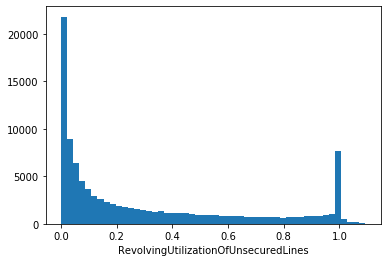

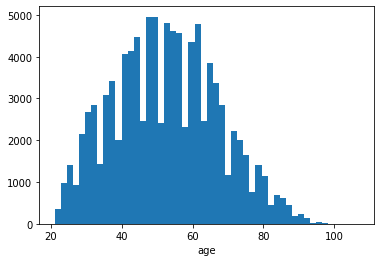

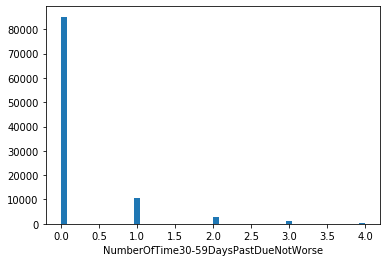

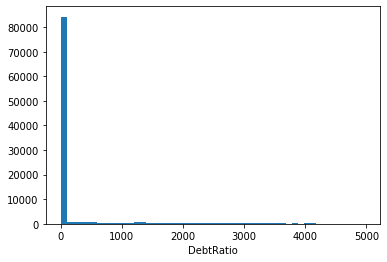

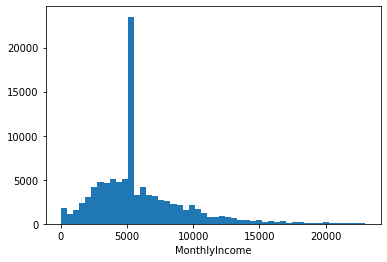

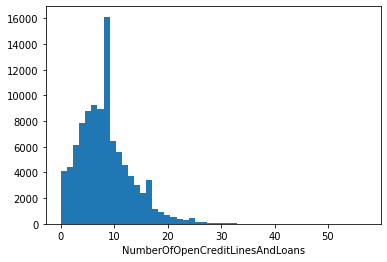

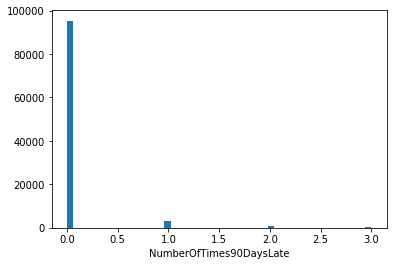

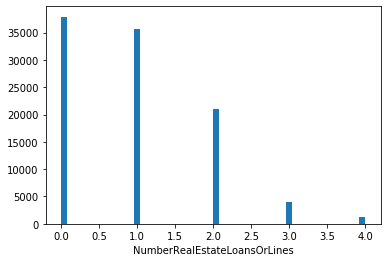

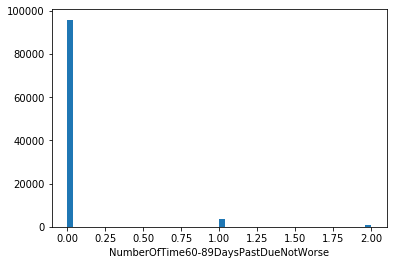

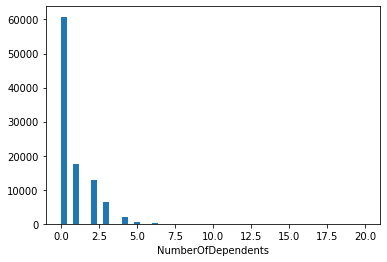

In [73]:
#分箱操作
for col in x_train.columns:
    data = x_train[col].values
    plt.hist(data, bins=50)
    plt.xlabel(col)
    plt.show()

In [74]:
data = x_train.NumberOfOpenCreditLinesAndLoans.values.copy()

In [75]:
target = y_train.values.copy()

In [76]:
target

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
df = pd.DataFrame(data={
    'data':data,
    'target':target
})

In [78]:
df

,data,target
0,5,0
1,6,0
2,2,0
3,2,0
4,9,0
...,...,...
99924,12,0
99925,14,0
99926,4,0
99927,15,0


In [79]:
#对数据进行分组
for k,v in df.groupby('data').groups.items():
    print(k,v)

0 Int64Index([  272,   293,   350,   353,   595,   626,   878,   881,   905,
              980,
            ...
            98991, 99092, 99180, 99227, 99327, 99415, 99500, 99619, 99756,
            99876],
           dtype='int64', length=1082)
1 Int64Index([    7,   126,   180,   280,   283,   303,   377,   394,   396,
              398,
            ...
            99587, 99589, 99610, 99650, 99674, 99689, 99746, 99789, 99916,
            99921],
           dtype='int64', length=3006)
2 Int64Index([    2,     3,    12,    27,    53,    62,    68,    72,    76,
               84,
            ...
            99647, 99655, 99669, 99737, 99742, 99768, 99775, 99799, 99856,
            99872],
           dtype='int64', length=4444)
3 Int64Index([   41,    51,    71,    86,    88,   129,   138,   154,   163,
              188,
            ...
            99827, 99835, 99845, 99851, 99854, 99860, 99877, 99890, 99904,
            99906],
           dtype='int64', length=6162)
4 Int64Index([  

In [80]:
#先计算所有good值和bed值
total_good = (df.target==0).sum()
total_bed = (df.target==1).sum()

In [81]:
total_bed

5802

In [82]:
iv = 0
for k,v in df.groupby('data').groups.items():
    group_data = df.loc[v]
    good = (group_data['target'] ==0).sum()
    bed = (group_data['target']==1).sum()
    good_prob = good/total_good
    bed_prob = bed/total_bed
    woei = np.log(good_prob / bed_prob)
    ivi = good_prob - bed_prob * woei
    iv += ivi
    print(f"{k}分组", f"woe:{woei}", f"iv:{iv}")
print(iv)

0分组 woe:-1.4378450980109394 iv:0.06438957666542325
1分组 woe:-0.8167488534267471 iv:0.14421898489109575
2分组 woe:-0.3816537923613914 iv:0.2117291095209575
3分组 woe:-0.09454915380947532 iv:0.27941161171018064
4分组 woe:0.1196394749288967 iv:0.35008250800919927
5分组 woe:0.08559784496203134 iv:0.43156748068517076
6分组 woe:0.14648418812844038 iv:0.5133128741011461
7分组 woe:0.14072877151751476 iv:0.5925484044257443
8分组 woe:0.3683547196486024 iv:0.6571461247954994
9分组 woe:0.16353614377131837 iv:0.7233915475991187
10分组 woe:0.06541965459921316 iv:0.7838475206576878
11分组 woe:0.1306644414055592 iv:0.8334067158070234
12分组 woe:-0.0058965453947125 iv:0.8792537711731319
13分组 woe:0.18778982506457023 iv:0.9110360881003206
14分组 woe:0.02837099299904584 iv:0.9405206581720543
15分组 woe:-0.2023317209007814 iv:0.9698551967685509
16分组 woe:-0.03599863865832137 iv:0.9900335677967554
17分组 woe:0.08475959325336843 iv:1.0036998838650246
18分组 woe:-0.11723188074912984 iv:1.017058903711838
19分组 woe:0.2707751086695959 iv:1.0244

G:\JetBrains\ana\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
G:\JetBrains\ana\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [83]:
%run auto_bin.py

In [84]:
train_data = pd.concat((x_train, y_train), axis=1)

In [85]:
train_data

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
78316,0.019091,38,0,0.006799,5000.0,5,0,0,0,0.0,0
66142,0.000000,43,0,0.341463,7666.0,6,0,2,0,2.0,0
77835,0.054315,23,0,4.000000,5333.0,2,0,0,0,0.0,0
145141,0.215186,75,0,0.023710,4048.0,2,0,0,0,0.0,0
40104,0.052047,40,0,0.257350,8400.0,9,0,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11803,0.202104,73,0,0.341987,5584.0,12,0,1,0,1.0,0
109990,0.020804,68,1,0.325946,6000.0,14,0,4,0,1.0,0
50456,0.995067,59,0,0.388120,1733.0,4,0,0,0,0.0,0
80928,0.000647,77,0,379.000000,5333.0,15,0,0,0,0.0,0


In [86]:
train_data = pd.concat((x_test, y_test), axis=1)

In [87]:
#构造分箱器
autobin = AutoBins(train_data, 'SeriousDlqin2yrs')

In [88]:
#分箱操作
bins, woe_df, iv = autobin.auto_bins('NumberOfOpenCreditLinesAndLoans', n =2 ,show_iv= True)

对 NumberOfOpenCreditLinesAndLoans 列进行分箱: 
分组个数: 14 	iv值: 0.07848311347567465
分组个数: 13 	iv值: 0.07846868515576211
分组个数: 12 	iv值: 0.07845373638977451
分组个数: 11 	iv值: 0.07837146743672352
分组个数: 10 	iv值: 0.07828953426732517
分组个数: 09 	iv值: 0.07816737129143203
分组个数: 08 	iv值: 0.07758244022895018
分组个数: 07 	iv值: 0.07688424456384496
分组个数: 06 	iv值: 0.07588240325275777
分组个数: 05 	iv值: 0.07479871244947614
分组个数: 04 	iv值: 0.07184350244198798
分组个数: 03 	iv值: 0.0640206001095611
分组个数: 02 	iv值: 0.0583975784433175

最后分箱情况: 
分组个数: 02 	iv值: 0.0583975784433175

分组woe情况：
   min  max  count_0  count_1  total  percentage  bad_rate       woe
0 -inf  2.0     3328      382   3710    0.086628  0.102965 -0.664189
1  2.0  inf    37110     2007  39117    0.913372  0.051308  0.088350


In [89]:
#对每一列进行分箱
for column in train_data.columns:
    bins, woe, iv = autobin.auto_bins(column, n =2, show_iv=True)
    

对 RevolvingUtilizationOfUnsecuredLines 列进行分箱: 
分组个数: 18 	iv值: 1.0705531539072022
分组个数: 17 	iv值: 1.0705531501469234
分组个数: 16 	iv值: 1.0705531465403584
分组个数: 15 	iv值: 1.070422392085602
分组个数: 14 	iv值: 1.0698868195831759
分组个数: 13 	iv值: 1.069075051142168
分组个数: 12 	iv值: 1.0684708028859373
分组个数: 11 	iv值: 1.0655599560310758
分组个数: 10 	iv值: 1.0645237999139403
分组个数: 09 	iv值: 1.0625752306483431
分组个数: 08 	iv值: 1.0545666464015047
分组个数: 07 	iv值: 1.051747270016007
分组个数: 06 	iv值: 1.0459882010920838
分组个数: 05 	iv值: 1.0309242935129193
分组个数: 04 	iv值: 1.005758077471332
分组个数: 03 	iv值: 0.965178664710036
分组个数: 02 	iv值: 0.8321196349517013

最后分箱情况: 
分组个数: 02 	iv值: 0.8321196349517013

分组woe情况：
        min       max  count_0  count_1  total  percentage  bad_rate       woe
0      -inf  0.529157    31313      807  32120    0.749994  0.025125  0.829570
1  0.529157       inf     9125     1582  10707    0.250006  0.147754 -1.076567
对 age 列进行分箱: 
分组个数: 19 	iv值: 0.26488654948641166
分组个数: 18 	iv值: 0.26485029525218823
分组个数:

In [90]:
info_values = {}
woedf_values = {}
bins_values = {}

In [91]:
for column in train_data:
    bins, woe, iv = autobin.auto_bins(column, n =2, show_iv=True)
    

对 RevolvingUtilizationOfUnsecuredLines 列进行分箱: 
分组个数: 18 	iv值: 1.0705531539072022
分组个数: 17 	iv值: 1.0705531501469234
分组个数: 16 	iv值: 1.0705531465403584
分组个数: 15 	iv值: 1.070422392085602
分组个数: 14 	iv值: 1.0698868195831759
分组个数: 13 	iv值: 1.069075051142168
分组个数: 12 	iv值: 1.0684708028859373
分组个数: 11 	iv值: 1.0655599560310758
分组个数: 10 	iv值: 1.0645237999139403
分组个数: 09 	iv值: 1.0625752306483431
分组个数: 08 	iv值: 1.0545666464015047
分组个数: 07 	iv值: 1.051747270016007
分组个数: 06 	iv值: 1.0459882010920838
分组个数: 05 	iv值: 1.0309242935129193
分组个数: 04 	iv值: 1.005758077471332
分组个数: 03 	iv值: 0.965178664710036
分组个数: 02 	iv值: 0.8321196349517013

最后分箱情况: 
分组个数: 02 	iv值: 0.8321196349517013

分组woe情况：
        min       max  count_0  count_1  total  percentage  bad_rate       woe
0      -inf  0.529157    31313      807  32120    0.749994  0.025125  0.829570
1  0.529157       inf     9125     1582  10707    0.250006  0.147754 -1.076567
对 age 列进行分箱: 
分组个数: 19 	iv值: 0.26488654948641166
分组个数: 18 	iv值: 0.26485029525218823
分组个数:

In [92]:
#选取最佳分箱
good_bins = {
    'RevolvingUtilizationOfUnsecuredLines':5,
    'age':2,
    'NumberOfTime30-59DaysPastDueNotWorse':2,
    'DebtRatio':5,
    'MonthlyIncome':5,
    'NumberOfOpenCreditLinesAndLoans':5,
    'NumberOfTimes90DaysLate':2,
    'NumberRealEstateLoansOrLines':3,
    'NumberOfTime60-89DaysPastDueNotWorse':2,
    'NumberOfDependents':4,
}

In [93]:
for column, n in good_bins.items():
    bins, woe_df, iv = autobin.auto_bins(column, n, show_iv=False)
    info_values[column] = iv
    woedf_values[column] = woe_df,
    bins_values[column] = [x[0] for x in bins] + [float('inf')]

对 RevolvingUtilizationOfUnsecuredLines 列进行分箱: 
对 age 列进行分箱: 
对 NumberOfTime30-59DaysPastDueNotWorse 列进行分箱: 
对 DebtRatio 列进行分箱: 
对 MonthlyIncome 列进行分箱: 
对 NumberOfOpenCreditLinesAndLoans 列进行分箱: 
对 NumberOfTimes90DaysLate 列进行分箱: 
对 NumberRealEstateLoansOrLines 列进行分箱: 
对 NumberOfTime60-89DaysPastDueNotWorse 列进行分箱: 
对 NumberOfDependents 列进行分箱: 


In [103]:
woedf_values

{'RevolvingUtilizationOfUnsecuredLines': (        min       max  count_0  count_1  total  percentage  bad_rate       woe
  0      -inf  0.105170    18979      294  19273    0.450020  0.015255  1.338614
  1  0.105170  0.328303     8297      267   8564    0.199967  0.031177  0.607506
  2  0.328303  0.529157     4037      246   4283    0.100007  0.057436 -0.030969
  3  0.529157  0.814995     3845      438   4283    0.100007  0.102265 -0.656585
  4  0.814995       inf     5280     1144   6424    0.149999  0.178082 -1.299500,),
 'age': (    min   max  count_0  count_1  total  percentage  bad_rate       woe
  0  -inf  56.0    24171     1918  26089    0.609172  0.073518 -0.295024
  1  56.0   inf    16267      471  16738    0.390828  0.028140  0.713141,),
 'NumberOfTime30-59DaysPastDueNotWorse': (   min  max  count_0  count_1  total  percentage  bad_rate       woe
  0 -inf  0.0    35215     1329  36544    0.853293  0.036367  0.448150
  1  0.0  inf     5223     1060   6283    0.146707  0.168709

In [94]:
pd.Series(data = info_values)

RevolvingUtilizationOfUnsecuredLines    1.030924
age                                     0.206791
NumberOfTime30-59DaysPastDueNotWorse    0.529132
DebtRatio                               0.087160
MonthlyIncome                           0.077694
NumberOfOpenCreditLinesAndLoans         0.074799
NumberOfTimes90DaysLate                 0.628069
NumberRealEstateLoansOrLines            0.052525
NumberOfTime60-89DaysPastDueNotWorse    0.418724
NumberOfDependents                      0.027188
dtype: float64

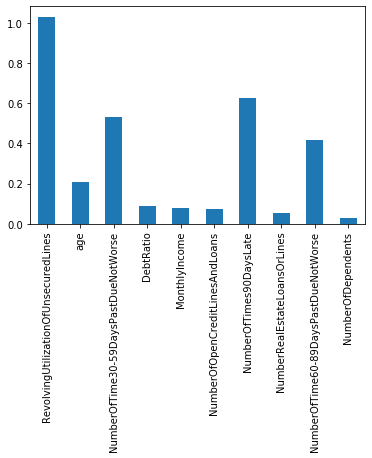

In [95]:
#特征重要性评估
pd.Series(data = info_values).plot(kind='bar')

In [96]:
train_data

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
147611,0.881546,43,4,0.814892,6244.0,10,0,2,0,1.0,1
27369,0.092479,87,0,45.000000,5333.0,1,0,0,0,0.0,0
59705,0.000000,59,0,0.306924,1400.0,5,0,0,0,0.0,0
28191,0.025723,82,0,0.004199,5000.0,3,0,0,0,0.0,0
115901,0.806296,49,2,1.123750,3700.0,12,0,2,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
111065,0.007665,67,0,1845.500000,1.0,8,0,2,0,0.0,0
104695,0.000000,57,0,0.372663,10000.0,11,0,2,0,2.0,0
90968,1.000000,50,0,0.000000,4333.0,0,0,0,0,0.0,0
79664,0.314611,54,0,0.388049,12500.0,16,0,2,0,1.0,0


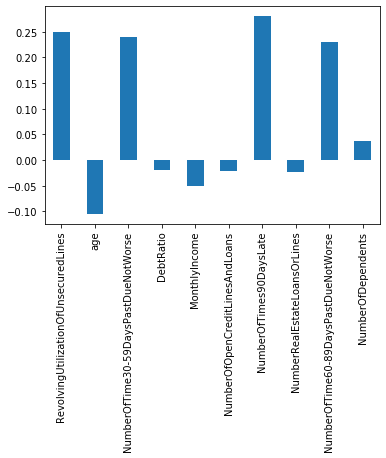

In [97]:
#使用皮尔逊相关系数来评估
train_data.corr().iloc[-1,:-1].plot(kind='bar')

In [98]:
importance_columns = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate',
    'NumberOfTime60-89DaysPastDueNotWorse'
]

In [100]:
#使用分箱的方法转换woe值
for col in train_data.columns[:-1]:
    train_data[col] = pd.cut(train_data[col],bins=bins_values[col],labels=woedf_values[col]['woe'].values)

TypeError: tuple indices must be integers or slices, not str

AttributeError: 'tuple' object has no attribute 'values'

In [ ]:
#建模
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [ ]:
#构造逻辑回归对象
lr = LogisticRegression(solver='liblinear')
params = {
    'penalty':['11','12'],
    'C':[0.1,1,10],
    'max_iter':[50,100,200]
}

In [ ]:
gscv = GridSearchCV(estimator=lr, param_grid=params, cv=3)

In [ ]:
x_train = train_data[importance_columns].copy()

In [ ]:
#模型训练
gscv.fit(x_train, y_train)

In [ ]:
gscv.best_estimator_

In [ ]:
accuracy_score(y_train, gscv.best_estimator_.predict(x_train))

In [ ]:
#将测试集数据进行处理
th_99

In [ ]:
bins_values

In [ ]:
for col in x_test.columns:
    x_test[col] = pd.cut(x_test[col],bins=bins_values[col],labels=woedf_values[col]['woe'].values)

In [ ]:
x_test = x_test[importance_columns]

In [ ]:
x_test

In [ ]:
best_lr = gscv.best_estimator_

In [ ]:
accuracy_score(y_test,best_lr,predict(x_test))

In [ ]:
p0 = 600
PD0 = 20
odds = 1/600
B = PD0/np.log(2)
A = p0+B*np.log(2/600)

In [ ]:
y_prob = best_lr.proba(x_test)
y_prob

In [ ]:
adds = y_prob[:,1]/(1-y_prob[:,1])
scores = (A-B*np.log(odds)).astype(np.int32)

In [ ]:
scores